- *Alumno*:
- *Asignatura*: Ingeniería del Conocimiento
- *Curso*: 2021/2022
- *Profesor*: Fco. Javier Martínez de Pisón
- Universidad de La Rioja

# Proyecto 3. Parte 2. Diseño de DSS en Empresa de Ventas On-Line: Evaluación Avanzada de un Clasificador Binario de la Clase 2

###**Teoria**

El ejemplo siguiente está extraido de https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html pero ha sido mejorado con un ejemplo más, la visualización de curvas ROC y PRC, y el análisis del coste de diversos modelos. Así mismo, se ha incluañadido al cuaderno una función para extraer la matriz de confusión y las métricas más significativas.

In [1]:
%matplotlib inline

In [2]:

# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification, make_gaussian_quantiles
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import metrics
import matplotlib.colors as mcolors

In [3]:
h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025, probability=True),
    SVC(gamma=2, C=1, probability=True),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

In [4]:
# Construct dataset
num_samples = 500
X1, y1 = make_gaussian_quantiles(cov=2.,
                                 n_samples=int(num_samples*0.40), n_features=2,
                                 n_classes=2, random_state=1)
X2, y2 = make_gaussian_quantiles(mean=(3, 3), cov=1.5,
                                 n_samples=int(num_samples*0.60), n_features=2,
                                 n_classes=2, random_state=1)
X = np.concatenate((X1, X2))
y = np.concatenate((y1, - y2 + 1))
gaussian_quantiles = (X, y)

In [5]:
# Lineal
X, y = make_classification(n_samples=num_samples, n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(n_samples=num_samples, noise=0.3, random_state=0),
            make_circles(n_samples=num_samples, noise=0.2, factor=0.5, random_state=1),
            linearly_separable,
            gaussian_quantiles
            ]

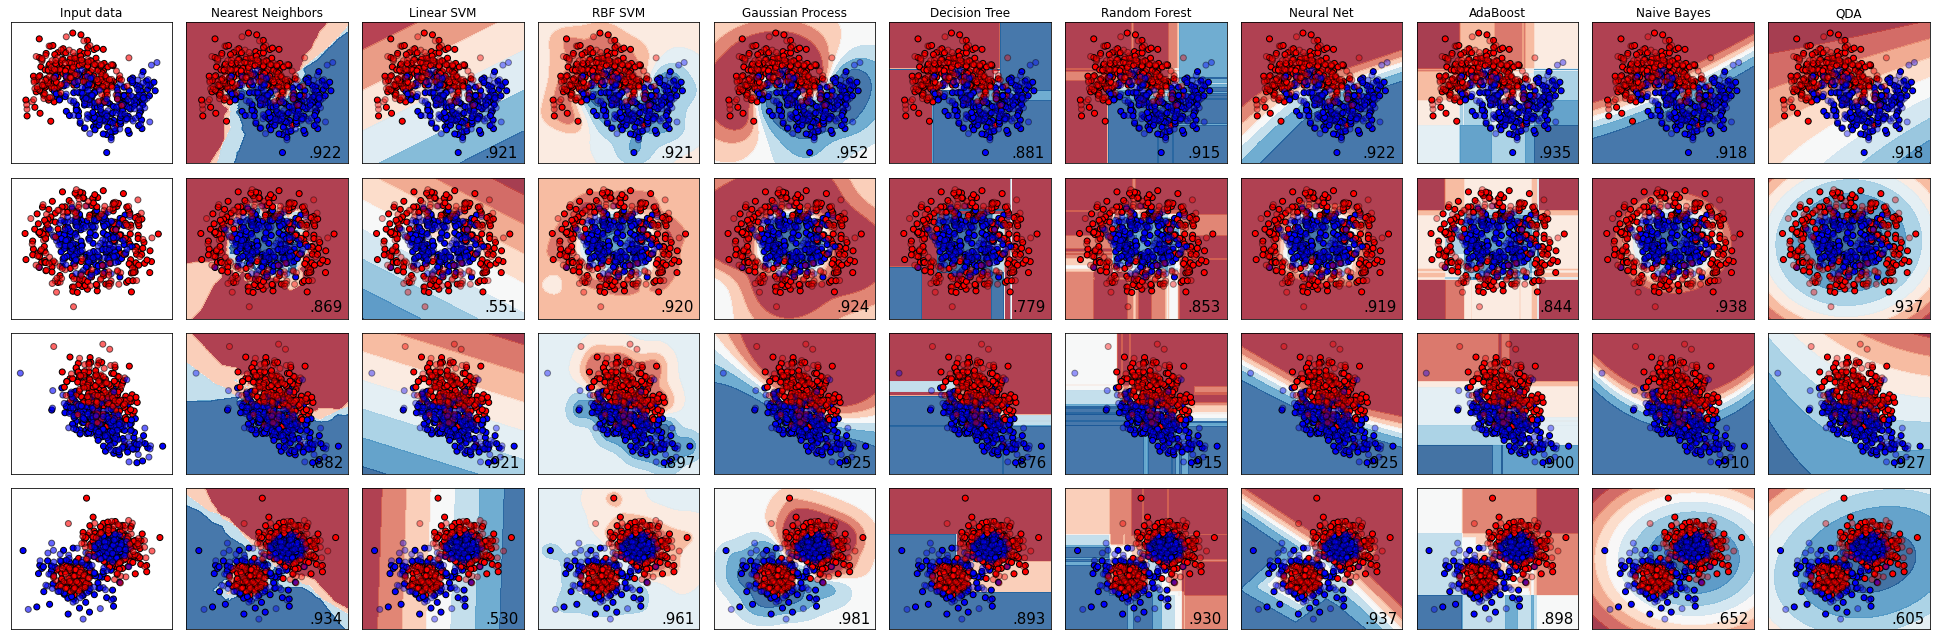

In [7]:
figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        pred = clf.predict_proba(X_test)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, pred[:,1])
        score = metrics.auc(fpr, tpr)
#         score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.4)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .2, yy.min() + .3, ('%.3f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

In [8]:
def dibu_roc(ds, quitmodels=[], tipo='auc', cfn=2000, cfp=5000):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)
    plt.figure(figsize=(10,10))
    lw = 2
    # iterate over classifiers
    colores = list(mcolors.TABLEAU_COLORS.values())
    
    for niter, (name, clf) in enumerate(zip(names, classifiers)):
        if niter not in quitmodels:
            clf.fit(X_train, y_train)
            pred = clf.predict_proba(X_test)
            if tipo=='roc':
                fpr, tpr, thresholds = metrics.roc_curve(y_test, pred[:,1])
                print(tpr)
                print(fpr)
                score = np.round(metrics.auc(fpr, tpr),3)
                
                # Calculamos el numero de falsos positivos y negativos para obtener el coste
                num_casos = np.unique(y_test,return_counts=True)[1]
                fp = fpr*num_casos[0]
                fn = (1-tpr)*num_casos[1]
                coste = fn*cfn+fp*cfp
                menor_coste = np.round(np.min(coste),2)
                
                thr_menor = np.round(thresholds[np.argmin(coste)],3)
                pos_min_coste = np.argmin(coste)
                
                plt.plot(fpr, tpr, color=colores[niter], lw=lw, label=f'{niter} - {name} AUC={score}')
                plt.scatter([fpr[pos_min_coste]],[tpr[pos_min_coste]],marker='x',color='blue',s=30)
                plt.text(fpr[pos_min_coste]+0.03,tpr[pos_min_coste],f'coste={menor_coste} thr={thr_menor}')
            if tipo=='prc':
                pre, rec, thresholds = metrics.precision_recall_curve(y_test, pred[:,1])
                score = np.round(metrics.average_precision_score(y_test, pred[:,1]),3)
                plt.plot(pre, rec, color=colores[niter], lw=lw, label=f'{niter} - {name} PRC={score}')
    
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xticks(np.arange(0,1.1,0.1))
    plt.yticks(np.arange(0,1.1,0.1))
    if tipo=='auc':
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic')
        plt.legend(loc="lower right")
    if tipo=='prc':
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title('Precision Recall Curve')
        plt.legend(loc="lower left")
    plt.show()      
    


[0.         0.01020408 0.13265306 0.13265306 0.15306122 0.15306122
 0.55102041 0.55102041 0.66326531 0.66326531 0.7244898  0.7244898
 0.73469388 0.73469388 0.81632653 0.81632653 0.87755102 0.87755102
 0.8877551  0.8877551  0.89795918 0.89795918 0.90816327 0.90816327
 0.92857143 0.92857143 0.93877551 0.93877551 0.94897959 0.94897959
 0.95918367 0.95918367 0.96938776 0.96938776 0.97959184 0.97959184
 0.98979592 0.98979592 1.         1.        ]
[0.         0.         0.         0.00980392 0.00980392 0.01960784
 0.01960784 0.02941176 0.02941176 0.03921569 0.03921569 0.05882353
 0.05882353 0.06862745 0.06862745 0.07843137 0.07843137 0.10784314
 0.10784314 0.14705882 0.14705882 0.15686275 0.15686275 0.25490196
 0.25490196 0.30392157 0.30392157 0.32352941 0.32352941 0.52941176
 0.52941176 0.7254902  0.7254902  0.79411765 0.79411765 0.83333333
 0.83333333 0.92156863 0.92156863 1.        ]
[0.         0.01020408 0.48979592 0.48979592 0.58163265 0.58163265
 0.75510204 0.75510204 0.76530612 0.76

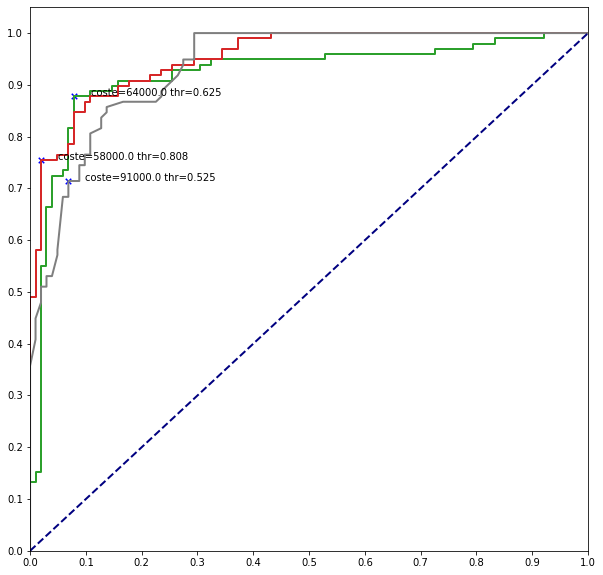

In [9]:
dibu_roc(datasets[0],quitmodels=[0,1,4,5,6,8,9], tipo='roc', cfn=2000, cfp=5000)

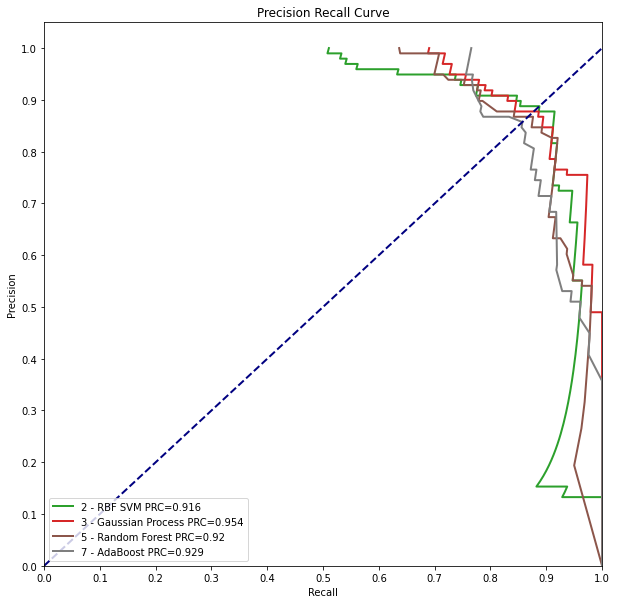

In [10]:
dibu_roc(datasets[0],[0,1,4,6,8,9],'prc')

In [11]:
def dibu_confusion(ds, nmodel=0, thr=0.50):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)
    plt.figure(figsize=(10,10))
    lw = 2
    # iterate over classifiers
    colores = list(mcolors.TABLEAU_COLORS.values())

    for niter, (name, clf) in enumerate(zip(names, classifiers)):
        if niter==nmodel:
            clf.fit(X_train, y_train)
            pred = clf.predict_proba(X_test)
            
            mat_scores = pd.DataFrame(metrics.precision_recall_fscore_support(y_test==1, (pred[:,1]>thr), average=None,zero_division=0)).round(3)
            mat_scores.index = ['precision','recall','f1score','num']
            print(name)
            print(mat_scores)
            
            tn, fp, fn, tp = metrics.confusion_matrix(y_test==1, (pred[:,1]>thr)).ravel()
            
            cm = metrics.confusion_matrix(y_test==1, (pred[:,1]>thr))
            fig, ax = plt.subplots(figsize=(12,12))
            disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
            disp.plot(ax=ax)
            ax.tick_params(axis='x', labelrotation=60)
            plt.title(f'Modelo={name}')
            plt.show()

AdaBoost
                 0       1
precision    0.772   0.909
recall       0.931   0.714
f1score      0.844   0.800
num        102.000  98.000


<Figure size 720x720 with 0 Axes>

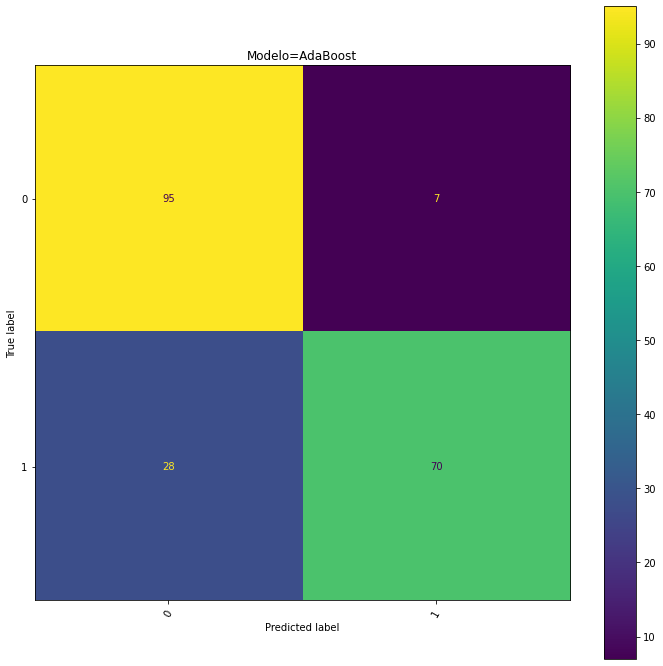

In [12]:
dibu_confusion(datasets[0],7,0.525)

### EJERCICIO  4

Vamos a analizar los mejores modelos de la primera parte ante diversas condiciones.

Adaptando las funciones previas, realizar las tareas siguientes y responder en un Informe PDF a las respuestas planteadas:

- Elegir de la primera parte 3.1 los CUATRO MODELOS que mejor AUC obtuvieron.
- Representar sus curvas ROC y PRC. Analizarlas ambas gráficas y decidir qué modelo funciona mejor. Justificar la respuesta y explicar si hay modelos que funcionen mejor que otros y en qué zonas.
- Elegir el modelo y el umbral (threshold) que tenga el ratio de Verdaderos Positivos más alto siempre que el ratio de Falsos Negativos sea **menor del 10%**. Presentar su matriz de confusión y explicar los resultados para ese umbral(TP-Rate, FP-Rate).
- Elegir el modelo y el umbral (threshold) que tenga el ratio de Verdaderos Positivos más alto siempre que el ratio de Falsos Negativos sea **menor del 30%**. Presentar su matriz de confusión y explicar los resultados para ese umbral(TP-Rate, FP-Rate).
- Se ha estimado que el coste de clasificar un producto como clase 2 cuando no lo es, es de 0.50 euros; mientras que el coste de clasificar un producto de la clase 2 en otra clase es de 5 euros. Elegir el modelo y su umbral que consiga el menor coste total. Presentar los resultados y el coste final de todos los modelos. Explicar los resultados.

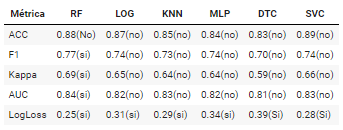

####**Solucion**

In [13]:
!wget https://github.com/IC1920/Datasets/raw/master/train.zip -O train.zip
!wget https://github.com/IC1920/Datasets/raw/master/test.zip -O test.zip
!unzip -o train.zip
!unzip -o test.zip

--2022-06-08 15:08:17--  https://github.com/IC1920/Datasets/raw/master/train.zip
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/IC1920/Datasets/master/train.zip [following]
--2022-06-08 15:08:18--  https://raw.githubusercontent.com/IC1920/Datasets/master/train.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1655239 (1.6M) [application/zip]
Saving to: ‘train.zip’

train.zip           100%[===================>]   1.58M  --.-KB/s    in 0.02s   

2022-06-08 15:08:19 (63.9 MB/s) - ‘train.zip’ saved [1655239/1655239]

--2022-06-08 15:08:19--  https://github.com/IC1920/Datasets/raw/master/test.zip

In [14]:
# Leemos los archivos 
df_train = pd.read_csv('train.csv')
features = ['feat_'+str(i) for i in np.arange(1,94)]
target = 'target'
y_train_class2 = np.zeros(len(df_train), dtype=int)
y_train_class2[df_train.target=='Class_2'] = 1

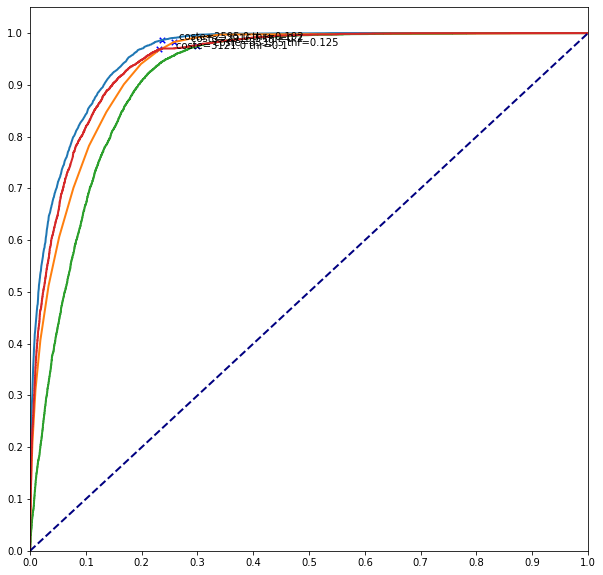

In [ ]:
# Ejemplo
names = ["RF","KNN","SVC","LOG"]
datasets = [(df_train[features].values, y_train_class2),
            (df_train[features].values, y_train_class2)]
classifiers = [
    RandomForestClassifier(n_estimators=600, n_jobs=-1, random_state=4567),
    KNeighborsClassifier(n_neighbors=15),
    LogisticRegression(C=18.7, random_state=1234, n_jobs=-1),
    SVC(C=17, kernel='rbf',probability=True)  ]
dibu_roc(datasets[0],[],'roc', cfn=5, cfp=0.50)

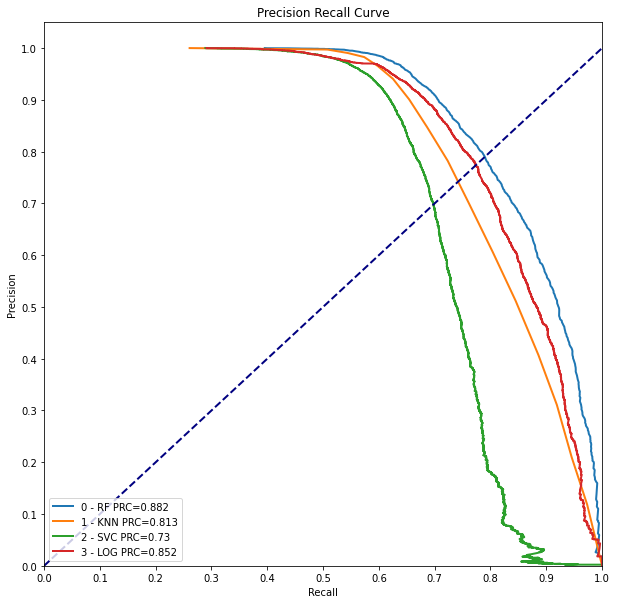

In [ ]:
names = ["RF","KNN","SVC","LOG"]
datasets = [(df_train[features].values, y_train_class2),
            (df_train[features].values, y_train_class2)]
classifiers = [
    RandomForestClassifier(n_estimators=600, n_jobs=-1, random_state=4567),
    KNeighborsClassifier(n_neighbors=15),
    LogisticRegression(C=18.7, random_state=1234, n_jobs=-1),
    SVC(C=17, kernel='rbf',probability=True)  ]
dibu_roc(datasets[0],[],'prc', cfn=5, cfp=0.50)

**Conclusión y analisis de las curvas ROC y PRC**

Una curva ROC ) es una representación gráfica de la sensibilidad (TP Rate) frente a (“1 –
especificidad” o FP Rate) para un sistema clasificador binario según se varía el
umbral de discriminación.

Si analizamos la curva ROC correspondiente a los 4 modelos podemos apreciar que los 4 son buenos clasificadores, ya que, tienen un alto TPR y un bajo FPR, pero el mejos de ellos es el Random Forest(color azul)

Una curva PRC (Precision Recall Curve) es otra opción de representación de la
“bondad” de un clasificador entre el Recall o TP Rate y Precision,en algunos casos donde existe una enorme diferencia entre el número de
casos negativos frente a los positivos puede ocurrir que en las curvas ROC
no se produzcan diferencias significativas.

En este caso está claro cual es el mejor algoritmo.

Pero podemos apreciar mucho mejor con la curva PCR como se cruzan las lienas del KNN y el LOG, lo que indica que a veces es mejor un modelo que otro dependiendo la zona.

**A continuación elegirimos el el modelo y el umbral (threshold) que tenga el ratio de Verdaderos Positivos más alto siempre que el ratio de Falsos Negativos sea menor del 10%. Presentar su matriz de confusión y explicar los resultados para ese umbral(TP-Rate, FP-Rate)**

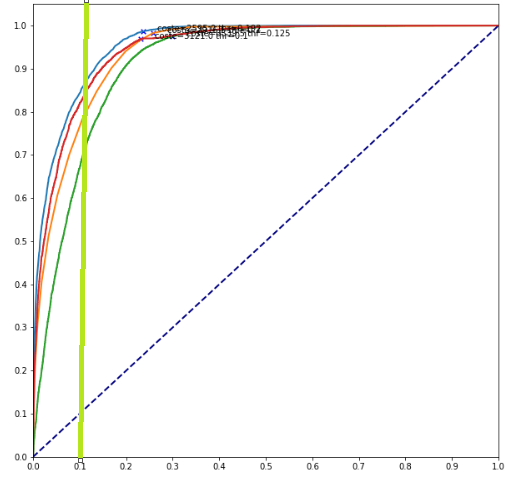

Nos quedamos con aquel modelo que sea mejor de la lineza vertical verde hacia la izquierda, claramente el mejor es el RandomForest.
Para calcular el thr jugamos con los pesos cfn y cfp y para este caso obtenemos un thr = 0.192

[0.00000000e+00 4.64684015e-04 1.08426270e-03 2.94299876e-03
 3.40768278e-03 5.88599752e-03 7.28004957e-03 9.29368030e-03
 1.02230483e-02 1.13073110e-02 1.17719950e-02 1.37856258e-02
 1.54894672e-02 1.75030979e-02 1.92069393e-02 2.13754647e-02
 2.27695167e-02 2.46282528e-02 2.61771995e-02 3.00495663e-02
 3.23729864e-02 3.57806691e-02 3.70198265e-02 3.88785626e-02
 4.05824040e-02 4.36802974e-02 4.61586121e-02 4.70879802e-02
 4.91016109e-02 5.09603470e-02 5.18897150e-02 5.39033457e-02
 5.56071871e-02 5.79306072e-02 5.96344486e-02 6.25774473e-02
 6.58302354e-02 6.76889715e-02 7.03221809e-02 7.31102850e-02
 7.49690211e-02 7.63630731e-02 7.80669145e-02 8.05452292e-02
 8.28686493e-02 8.50371747e-02 8.72057001e-02 8.85997522e-02
 9.35563817e-02 9.63444857e-02 1.00216853e-01 1.02230483e-01
 1.04863693e-01 1.07651797e-01 1.10130112e-01 1.12143742e-01
 1.14467162e-01 1.17100372e-01 1.19114002e-01 1.21902107e-01
 1.23605948e-01 1.25774473e-01 1.28562577e-01 1.30266419e-01
 1.31815366e-01 1.352230

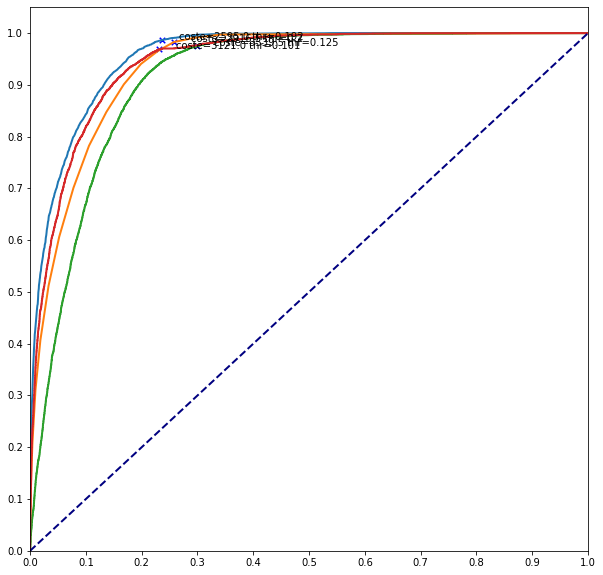

In [18]:
dibu_roc(datasets[0],[],'roc', cfn=5, cfp=0.50)

RF
                   0         1
precision      0.994     0.596
recall         0.764     0.986
f1score        0.864     0.743
num        18296.000  6456.000


<Figure size 720x720 with 0 Axes>

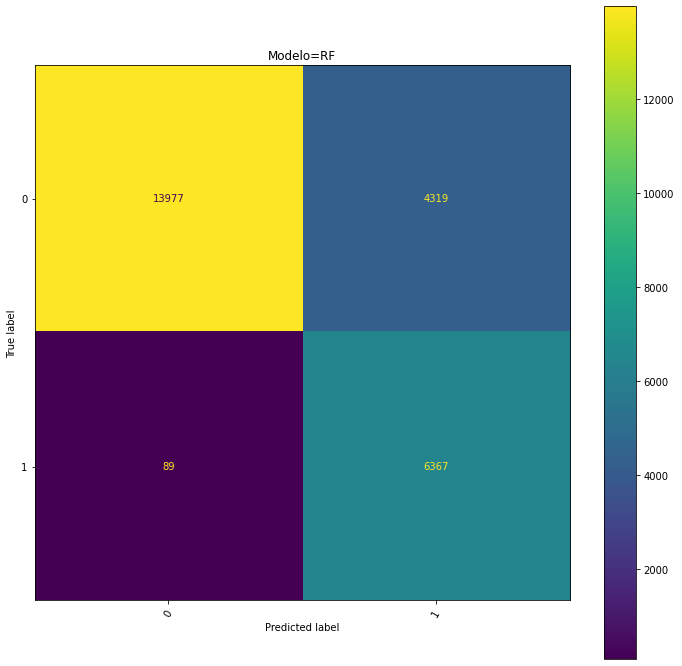

In [23]:
dibu_confusion(datasets[0],0,0.192)

**A continuación eligiremos el modelo y el umbral (threshold) que tenga el ratio de Verdaderos Positivos más alto siempre que el ratio de Falsos Negativos sea menor del 30%. Presentar su matriz de confusión y explicar los resultados para ese umbral(TP-Rate, FP-Rate).**

Repetimos el mismo proceso que el paso anterior y tambien concluimos que el random forest es el mejor.

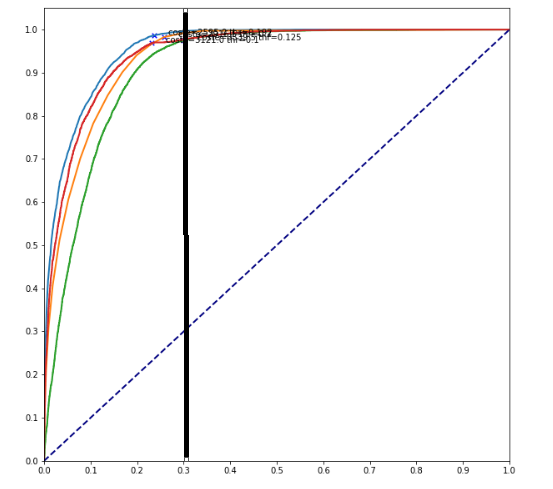

# ENTREGA

**Todos los pasos realizados deberán ser explicados con detalle en un documento PDF. El nombre del archivo deberá incluir lo siguiente 'PROYECTO3_NombreDelAlumnoSinAcentos.PDF'. Ejemplo: PROYECTO3_PEPITO_PEREZ.PDF**

Si usas Colab, recuerde guardar sus cambios en su repositorio utilizando la opción "Save a copy in GitHub..." del menú File.